<div style="border:solid Chocolate 2px; padding: 40px">

Привет, меня зовут Александр Куимов. Я буду ревьюером твоего проекта. Ты можешь обращаться ко мне на "ты"😏 Надеюсь, тебя также не смутит, если я буду обращаться к тебе на "ты", но если это неудобно, обязательно скажи об этом!

**Пожалуйста, не удаляй мои комментарии**, они будут особенно полезны для нашей работы в случае повторной проверки проекта. 

Ты также можешь реагировать на мои комментарии своими по шаблону, показанному чуть ниже. Это нужно, чтобы не создавалась путаница😉


Ты можешь найти мои комментарии, обозначенные <font color='green'>зеленым</font>, <font color='gold'>желтым</font> и <font color='red'>красным</font> цветами, например:

<br/>

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> В случае, если решение на отдельном шаге является полностью правильным.
</div>

<br/>

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> В случае, когда решение на отдельном шаге станет еще лучше, если внести небольшие коррективы.
</div>


<br/>
<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку🤔:</b> 
 В случае, когда решение на отдельном шаге требует существенной переработки и внесения правок. Напоминаю, что проект не может быть принят с первого раза, если ревью содержит комментарии, рекомендующие доработать шаги.
</div>
    
    
<br/>    
<div class="alert alert-info">
<h2> Комментарий студента: <a class="tocSkip"> </h2>

<b>👋:</b> В такой цветовой ячейке я прошу тебя оставлять свои комментарии. Если исправляешь проект на второй итерации и выше, не забывай пожалуйста указывать номер итерации, например, "Комментарий студента v.2".
</div> 

<br/>    
    
Увидев у тебя неточность, в первый раз я лишь укажу на ее наличие и дам тебе возможность самому найти и исправить ее. На реальной работе твой руководитель будет поступать также, и я пытаюсь подготовить тебя именно к работе датасаентистом. Но если ты пока не справишься с такой задачей - при следующей проверке я дам более точную подсказку!🤓

# Сборный проект —2. HR аналитика

Введение:


In [1]:
!pip install phik -q

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import phik
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, MinMaxScaler, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score

In [3]:
pip install --upgrade scikit-learn

Note: you may need to restart the kernel to use updated packages.


## Введение

- Нам предоставлены данные HR-аналитики компании «Работа с заботой». Компания помогает бизнесу оптимизировать управление персоналом: бизнес предоставляет данные, а аналитики предлагают, как избежать финансовых потерь и оттока сотрудников.
- Поставлены несколько задач:
  - построить модель, которая сможет предсказать уровень удовлетворённости сотрудника на основе данных заказчика.
  - построить модель, которая сможет на основе данных заказчика предсказать то, что сотрудник уволится из компании.
  
- В ходе работ планируется:
  - проверсти предобработку данных и исследовательский анализ
  - подбор и обучение моделей МО для предсказывания уровеня удовлетворённости сотрудника
  - выбор лучшей модели по метрике SMAPE <= 15 представленной заказчиком
  - составление портрета уволившегося сотрудника
  - проверка связи между удовлетвореннотью сотрудника и увольнением
  - подбор и обучение моделей МО для предсказания уволится ли сотрудник из компаниии
  - выбор лучшей модели по метрике предстваленной заказчиком. ROC AUC >= 0.91

## Предсказание уровня удовлетворённости сотрудника

### Загрузка данных

In [4]:
jsr_train = pd.read_csv('/datasets/train_job_satisfaction_rate.csv')
jsr_test_X = pd.read_csv('/datasets/test_features.csv')
jsr_test_y = pd.read_csv('/datasets/test_target_job_satisfaction_rate.csv')

In [5]:
for table in [jsr_train, jsr_test_X, jsr_test_y]:
    print(table.head())

       id        dept   level workload  employment_years last_year_promo  \
0  155278       sales  junior   medium                 2              no   
1  653870          hr  junior     high                 2              no   
2  184592       sales  junior      low                 1              no   
3  171431  technology  junior      low                 4              no   
4  693419          hr  junior   medium                 1              no   

  last_year_violations  supervisor_evaluation  salary  job_satisfaction_rate  
0                   no                      1   24000                   0.58  
1                   no                      5   38400                   0.76  
2                   no                      2   12000                   0.11  
3                   no                      2   18000                   0.37  
4                   no                      3   22800                   0.20  
       id       dept   level workload  employment_years last_year_pro

__Данные загрузили, таблицы соответствуют описанию__

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:  </b> 
    
С данными познакомились, проведен первичный аналитический осмотр!) Полученная информация поможет нам в дальнейшем с предобработкой данных

### Предобработка данных

In [6]:
for table in [jsr_train, jsr_test_X, jsr_test_y]:
    table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     4000 non-null   int64  
 1   dept                   3994 non-null   object 
 2   level                  3996 non-null   object 
 3   workload               4000 non-null   object 
 4   employment_years       4000 non-null   int64  
 5   last_year_promo        4000 non-null   object 
 6   last_year_violations   4000 non-null   object 
 7   supervisor_evaluation  4000 non-null   int64  
 8   salary                 4000 non-null   int64  
 9   job_satisfaction_rate  4000 non-null   float64
dtypes: float64(1), int64(4), object(5)
memory usage: 312.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----

__Типы данных корректны__

In [7]:
for df in [jsr_train, jsr_test_X, jsr_test_y]:
    print('Проверка на явные дубли:', df.duplicated().sum())

Проверка на явные дубли: 0
Проверка на явные дубли: 0
Проверка на явные дубли: 0


__Явные дуликаты отсутствуют__

In [8]:
dataframes = {
    'jsr_train': jsr_train,
    'jsr_test_X': jsr_test_X,
    'jsr_test_y': jsr_test_y
}

In [9]:
for name, df in dataframes.items():
    print(f'Уникальные значения категориальных признаков таблицы {name}')
    print()
    print()
    for column in df.select_dtypes(include=[object]).columns:
        print(f'{column} значения: {df[column].unique().tolist()}')
        print()

Уникальные значения категориальных признаков таблицы jsr_train


dept значения: ['sales', 'hr', 'technology', 'purchasing', 'marketing', nan]

level значения: ['junior', 'middle', 'sinior', nan]

workload значения: ['medium', 'high', 'low']

last_year_promo значения: ['no', 'yes']

last_year_violations значения: ['no', 'yes']

Уникальные значения категориальных признаков таблицы jsr_test_X


dept значения: ['marketing', 'hr', 'sales', 'purchasing', 'technology', nan, ' ']

level значения: ['junior', 'middle', 'sinior', nan]

workload значения: ['medium', 'low', 'high', ' ']

last_year_promo значения: ['no', 'yes']

last_year_violations значения: ['no', 'yes']

Уникальные значения категориальных признаков таблицы jsr_test_y




__Анализ на неявные дубли выявил следующее:__
- в таблице jsr_test_X в полях dept, workload необходимо заменить ' ' на Nan

In [10]:
jsr_test_X.query('dept == " " | workload == " "')

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary
15,590867,marketing,junior,,4,no,no,4,28800
1699,822186,,middle,medium,3,no,no,4,38400


In [11]:
jsr_test_X.loc[jsr_test_X['dept'] == ' ', 'dept'] = np.nan
jsr_test_X.loc[jsr_test_X['workload'] == ' ', 'workload'] = np.nan

__Посчитаем пропуски в таблицах__

In [12]:
for name, df in dataframes.items():
    print(f'Пропуски в таблице {name}')
    print(df.isna().sum())
    print()

Пропуски в таблице jsr_train
id                       0
dept                     6
level                    4
workload                 0
employment_years         0
last_year_promo          0
last_year_violations     0
supervisor_evaluation    0
salary                   0
job_satisfaction_rate    0
dtype: int64

Пропуски в таблице jsr_test_X
id                       0
dept                     3
level                    1
workload                 1
employment_years         0
last_year_promo          0
last_year_violations     0
supervisor_evaluation    0
salary                   0
dtype: int64

Пропуски в таблице jsr_test_y
id                       0
job_satisfaction_rate    0
dtype: int64



In [13]:
jsr_train[jsr_train.isna().any(axis=1)]

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
1209,631073,sales,NaN,medium,1,no,no,4,27600,0.66
1469,416327,sales,NaN,low,1,no,no,5,18000,0.73
1526,694746,NaN,junior,medium,5,no,no,4,21600,0.62
1630,814624,NaN,junior,medium,3,no,no,4,24000,0.88
1633,475114,NaN,junior,high,4,no,no,4,31200,0.63
1745,135043,sales,NaN,medium,1,no,no,3,26400,0.30
2522,998838,sales,NaN,medium,1,no,no,5,27600,0.71
2781,497243,NaN,junior,medium,1,no,no,3,26400,0.28
2975,168668,NaN,junior,low,3,no,no,4,18000,0.88
3866,641150,NaN,junior,low,3,no,yes,4,12000,0.54


In [14]:
jsr_test_X[jsr_test_X.isna().any(axis=1)]

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary
15,590867,marketing,junior,NaN,4,no,no,4,28800
191,609865,NaN,junior,medium,1,no,no,1,20400
312,471990,sales,NaN,low,1,no,no,3,12000
1196,832342,NaN,junior,medium,1,no,no,4,28800
1699,822186,NaN,middle,medium,3,no,no,4,38400


__Пропуски мы заполним в pipeline перед обучением моделей как посоветовал преподаватель "Вообще говоря, для EDA пропуски заполнять вообще не нужно. Они ведь никак тебе не помешают. Заполнять их нужно уже перед обучением модели"__

__Этап предобработки данных:__
- явные дубли в таблице не обнаружены
- неявные дубли в виде пустых строк заменены на NaN
- В таблицах есть несколько NaNs, заполним их позже в Pipeline

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍</b>
    
Аномалия обработана корректно. В целом она могла бы быть обработана и в `Pipeline`, при настройке энкодеров на обработку новых значений признаков, которые не были на момент обучения энкодера

### Исследовательский анализ данных

Проставим тип int количетвенным дискретным переменным, а float64 количественным беспрерывным переменным, для удобства использования функции.

In [15]:
jsr_train['salary'] = jsr_train['salary'].astype('float64')
jsr_test_X['salary'] = jsr_test_X['salary'].astype('float64')

In [20]:
def exploratory_analysis(df):
    num_discrete_cols = df.select_dtypes(include=[int]).columns
    num_cont_cols = df.select_dtypes(include=['float64']).columns
    categorical_columns = df.select_dtypes(include=[object]).columns
    for i in num_cont_cols:
        fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
        bins= ax1.hist(x=df[i])
        ax1.vlines(x=df[i].mean(), colors='red', ymin=bins[0].min(), ymax=bins[0].max(), label='Среднее')
        ax1.vlines(x=df[i].median(), colors='red', ymin=bins[0].min(), ymax=bins[0].max(), linestyles='--', label='Медиана')
        ax1.set_title(f'Гистограмма распределения: {i}')
        ax1.set_xlabel('Значения')
        ax1.set_ylabel('Частота')
        ax1.legend(loc='upper right', framealpha=0.3)
        
        ax2.boxplot(df[i], vert=False)
        ax2.set_title(f'Boxplot: {i}')
        ax2.set_xlabel('Значения')
        ax2.set_yticks([])
        y = np.ones_like(df[i])  
        ax2.scatter(df[i], y, color='blue', alpha=0.5, label='Значения')
        ax2.legend(loc='upper right')
        
        
        plt.show()
        
    for i in num_discrete_cols[1:]:
        sns.set(style="whitegrid")
        plt.figure(figsize=(8, 4))
        ax = sns.countplot(x=i, data=df, edgecolor="black", linewidth=1.5)
        plt.title(f'Распределение {i}')
        for p in ax.patches:
            ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5),
                        textcoords='offset points')
        plt.show()
    
    for i in categorical_columns:
        my_circle = plt.Circle( (0,0), 0.7, color='white')
        y = df[i].value_counts()
        x = y.index
        plt.pie(y, labels=x,autopct=lambda pct: f'{pct:.1f}%\n({int(pct/100.*sum(y))})',wedgeprops = { 'linewidth' : 7, 'edgecolor' : 'white' })
        p = plt.gcf()
        p.gca().add_artist(my_circle)
        plt.title(f'Распределение признака "{i}"')
        plt.show()

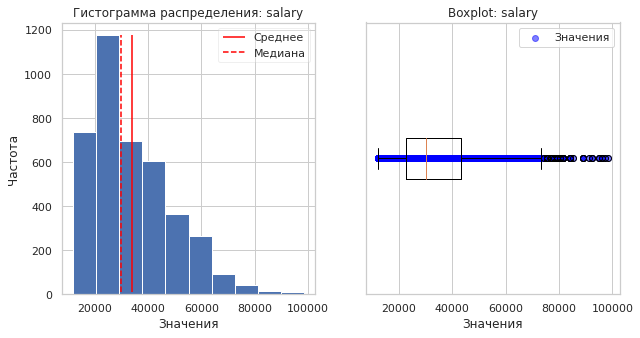

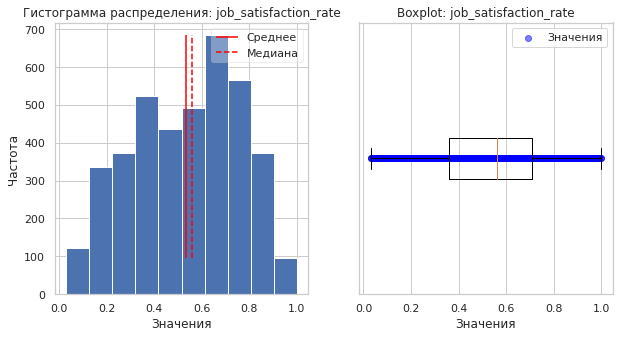

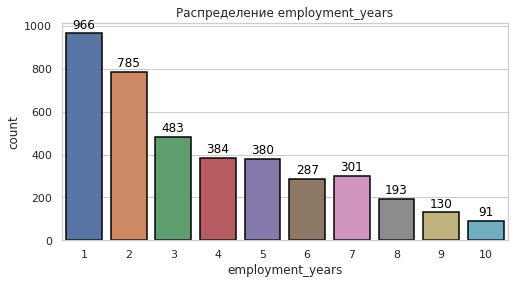

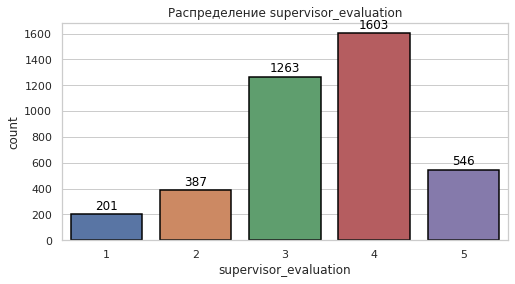

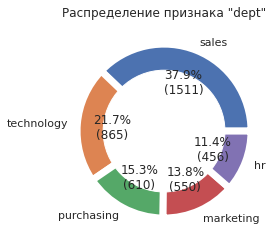

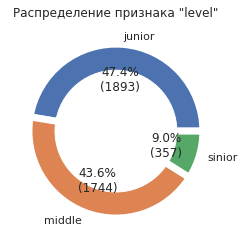

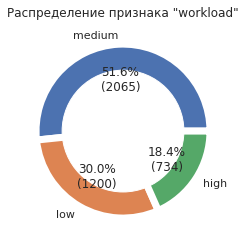

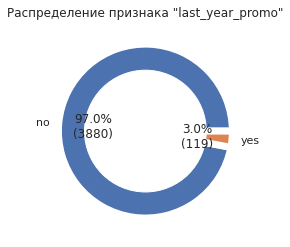

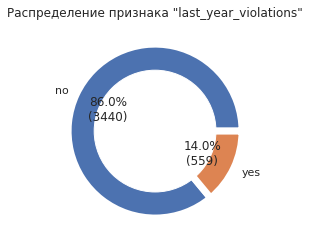

In [21]:
exploratory_analysis(jsr_train)

In [125]:
jsr_train.describe()

,id,employment_years,supervisor_evaluation,salary,job_satisfaction_rate
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,544957.621000,3.718500,3.476500,33926.700000,0.533995
std,257883.104622,2.542513,1.008812,14900.703838,0.225327
min,100954.000000,1.000000,1.000000,12000.000000,0.030000
25%,322836.750000,2.000000,3.000000,22800.000000,0.360000
50%,534082.500000,3.000000,4.000000,30000.000000,0.560000
75%,771446.000000,6.000000,4.000000,43200.000000,0.710000
max,999521.000000,10.000000,5.000000,98400.000000,1.000000


__Количественные признаки jsr_train:__
- employment_years распределение смещено вправо, преобладают небольшие значения, в связи с этим медиана меньше среднего, 3 против 3,7 лет, выбросов нет.
- supervisor_evaluation медиана 4, среднее 3,48, есть выбросы с меньшей стороны
- salary распределение смещено вправо, медиана 30 000, среднее 33 927, есть выбросы  справа
- job_satisfaction_rate выбросов нет, распределение имеет форму, близкую к симметричной, с небольшим отклонением влево, среднее 0,53, медиана 0,56. 

__Категориальные признаки jsr_train:__
- dept большинство сотрудников в sales, 38% и 1511 человек, далее technology 21,7%, purchasing 15,3%, marketing 13,8% и hr 11,4%
- level большинство junior 47,4% 1893 человек, middle 43,6%, sinior 9%
- workload medium 51,6%, low 30%, high 18,4%
- last year promo, повышения были только у 3% 119 человек
- last_year_violations нарушения договора были у 14% 559 человек.

<br/>
<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера  <a class="tocSkip"></h2>
    
<b>На доработку🤔:</b>

    
Ообычные гистограммы для анализа распределения дискретных признаков не подходят: так как `hist` гистограммы делят значения признаков на корзины с числом параметра `bins`, некоторые одинаковые значения могут падать в разные корзины (это хорошо видно на графиках, когда корзины неравно удалены друг от друга). 
    
Для их анализа нужнен тип графиков, который на каждое уникальные значение признака строит свою корзину. Например, можно использовать `sns.countplot`.
    
Для этих признаков также не нужно строить ящики с усами, так как признак имеет, скорее, распределение категориального признака, пусть и представленного уже в численном виде.

**это касается анализа и обучающей выборки, и тестовой выборки, как первой, так и второй задачи**    

</span><br><span style="color: purple; font-weight: bold">Спасибо, исправил!</span> 

<div class="alert alert-success">
<h2> Комментарий ревьюера 2 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b>

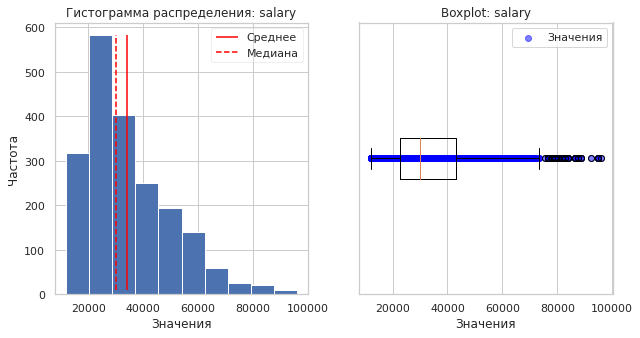

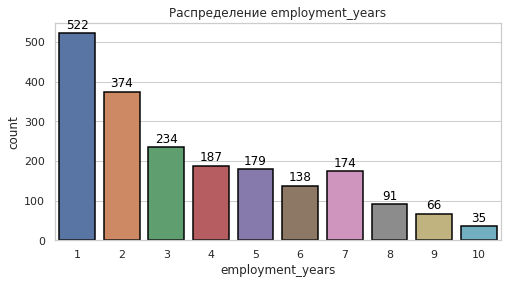

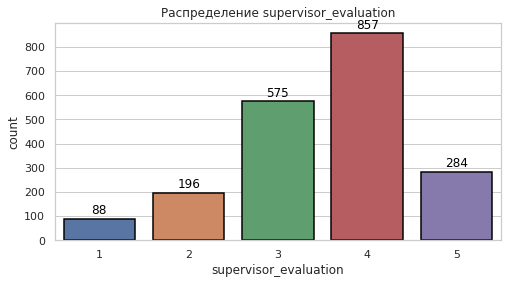

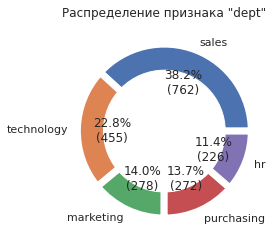

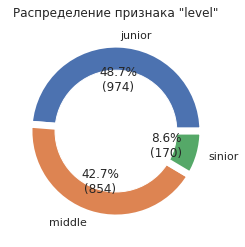

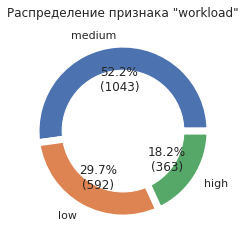

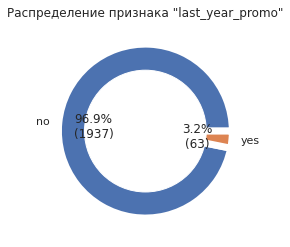

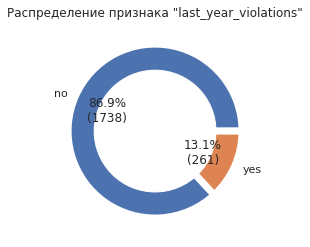

In [23]:
exploratory_analysis(jsr_test_X)

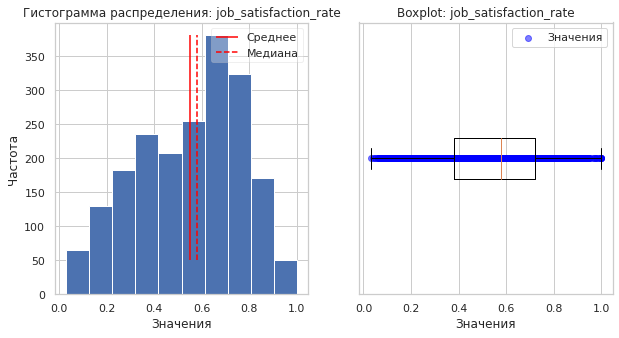

In [24]:
exploratory_analysis(jsr_test_y)

__В тестовой выборке признаки распределены аналогично тренировочной, подробнее выше__

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Верно!👍:\
</b> Мне интересно было изучить проведенный исследовательский анализ данных, твои графики, осмысленный и красочный графический анализ. Найдены очень интересные закономерности)

### Подготовка данных

Предлагаю сперва проверить данные на мультиколлинеарность

In [26]:
corr_matrix = jsr_train.drop(columns=['id']).phik_matrix(interval_cols=['job_satisfaction_rate', 'salary'])

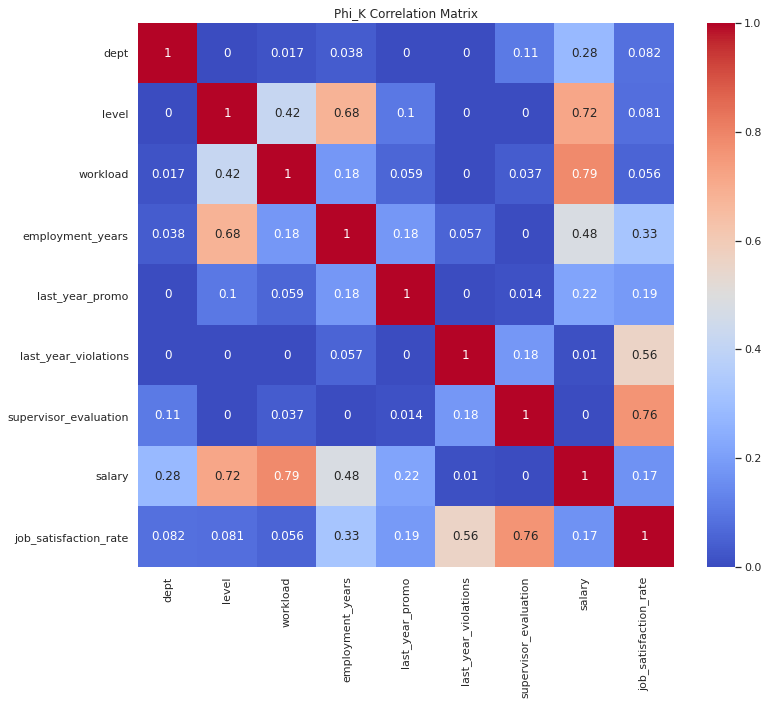

In [27]:
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Phi_K Correlation Matrix')
plt.show()

- __Мультиколлинеарность (коеф. Фик более 0,9) между входными признаками не наблюдаем.__ 
- __по целевому признаку наблюдаем заметную и высокую положительную связь с last_year_violations и supervisor evaluation соответственно. Интересно.__ 

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 

Отлично, что при использовании phik настроен параметр interval_cols)


<br/>
<div class="alert alert-block alert-danger">

    
<b>На доработку🤔:</b> 
    
Согласно документации `phik_matrix` в `interval_cols` нужно передавать только непрерывные признаки.
    
Добавлю, что `employment_years` и `supervisor_evaluation` - дискретные признаки, их нельзя передавать в `interval_cols`.
    
Пожалуйста, оставь в `interval_cols` только непрерывные признаки 
    
На всякий случай отмечу, что  `job_satisfaction_rate` и `salary` - это непрерывные признаки 

</span><br><span style="color: purple; font-weight: bold">Спасибо, исправил</span> 

<div class="alert alert-success">
<h2> Комментарий ревьюера 2 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b>

In [28]:
RANDOM_STATE = 42

In [29]:
X = jsr_train.drop(columns='job_satisfaction_rate')
y = jsr_train['job_satisfaction_rate']

Определим какие признаки как будем кодировать

In [30]:
ohe_cols = ['dept', 'last_year_promo', 'last_year_violations']
ord_cols = ['level', 'workload']
num_cols = X.select_dtypes(include=[int,'float64']).columns.to_list()

Не забываем о пропусках в столбцах dept, level и workload.
Заполним пропуски модой

In [32]:
ohe_pipe = Pipeline([
    ('simpleImputer_ohe', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
    ('ohe', OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False))
])

 <br/>
<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>
    
<b>На доработку🤔:</b>

    
Здесь есть важный момент, связанный с настройкой бесперебойности этого трансформера: по умолчанию у `OneHotEncoder` параметр `handle_unknown` принимает значение `error`, что приведёт к ошибке в случае, если в `test` или другой не-`train` выборке будут такие значения, которых в `train` не было при обучении трансформера. То есть у `OneHotEncoder` нужно задать у параметра `handle_unknown` значение 'ignore'

</span><br><span style="color: purple; font-weight: bold">Исправил, спасибо</span> 

<div class="alert alert-success">
<h2> Комментарий ревьюера 2 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b>

In [33]:
ord_pipe = Pipeline([
    ('simpleImputer_before_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
    ('ord',  OrdinalEncoder(
categories=[
    ['junior', 'middle', 'sinior'],
    ['low', 'medium', 'high']
           ],
        handle_unknown='use_encoded_value', unknown_value=np.nan)),
    ('simpleImputer_after_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent'))
        
])

__Общий pipeline для подготовки данных__

In [34]:
data_preprocessor = ColumnTransformer(
        [('ohe', ohe_pipe, ohe_cols),
        ('ord', ord_pipe, ord_cols),
        ('num', MinMaxScaler(), num_cols)
        ],
remainder='passthrough'
)

In [35]:
X_transformed = data_preprocessor.fit_transform(X)

In [36]:
feature_names = data_preprocessor.get_feature_names_out()
X_transformed = pd.DataFrame(X_transformed, columns=feature_names)
X_transformed.head()

,ohe__dept_marketing,ohe__dept_purchasing,ohe__dept_sales,ohe__dept_technology,ohe__last_year_promo_yes,ohe__last_year_violations_yes,ord__level,ord__workload,num__id,num__employment_years,num__supervisor_evaluation,num__salary
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.060456,0.111111,0.00,0.138889
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.615331,0.111111,1.00,0.305556
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.093079,0.000000,0.25,0.000000
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.078433,0.333333,0.25,0.069444
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.659344,0.000000,0.50,0.125000


In [37]:
X_transformed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   ohe__dept_marketing            4000 non-null   float64
 1   ohe__dept_purchasing           4000 non-null   float64
 2   ohe__dept_sales                4000 non-null   float64
 3   ohe__dept_technology           4000 non-null   float64
 4   ohe__last_year_promo_yes       4000 non-null   float64
 5   ohe__last_year_violations_yes  4000 non-null   float64
 6   ord__level                     4000 non-null   float64
 7   ord__workload                  4000 non-null   float64
 8   num__id                        4000 non-null   float64
 9   num__employment_years          4000 non-null   float64
 10  num__supervisor_evaluation     4000 non-null   float64
 11  num__salary                    4000 non-null   float64
dtypes: float64(12)
memory usage: 375.1 KB


In [38]:
X.head()

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary
0,155278,sales,junior,medium,2,no,no,1,24000.0
1,653870,hr,junior,high,2,no,no,5,38400.0
2,184592,sales,junior,low,1,no,no,2,12000.0
3,171431,technology,junior,low,4,no,no,2,18000.0
4,693419,hr,junior,medium,1,no,no,3,22800.0


__Pipeline по обработке данных перед обучением моделей готов, входные признаки в тренировчном df преобразованы__

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 


Отлично, что использовано более одного энкодера, взятого из готовой реализации библиотеки sklearn)

### Обучение моделей

Для задания потребуется создание своей метрики для оценки качества моделей:
- Обучите как минимум две модели. Возьмите одну линейную модель, а в качестве второй — дерево решений. Подберите гиперпараметры как минимум для одной модели с помощью одного из известных вам инструментов.
Выберите лучшую модель и проверьте её качество. Выбор делайте на основе новой метрики — SMAPE (англ. symmetric mean absolute percentage error, «симметричное среднее абсолютное процентное отклонение»). 

Итак, создадим метрику

In [39]:
def smape(y_true, y_pred):
    smape = 100/len(y_true) * np.sum(2 * np.abs(y_pred - y_true) / (np.abs(y_true) + np.abs(y_pred)))
    return smape   

Так как SMAPE это symmetric mean absolute percentage error, чем меньшее ее значение, тем лучше

In [40]:
scorer = make_scorer(smape, greater_is_better=False)

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 
    
Верно, что задаешь параметр `greater_is_better=False`. Дело в том, что разработчики пакета `sklearn` при создании функций `cross_val_score` и `GridSearchCV` утвердили соглашение: возвращаемые результаты вычислений данных функций должны соответствовать задаче максимизации (чем большее значение метрики получаем, тем лучше). При этом обратная задача минимизации может быть осуществлена через максимизацию метрики, домноженной на -1. Об этом можно чуть подробнее почитать в документации пакета, правда она на английском. Оставлю <a href = 'https://scikit-learn.org/stable/modules/model_evaluation.html'>ссылку</a>. 

__Создали нашу метрику качества выше__

__Начнем с простой модели линейной регрессии.__

In [41]:
model_lr = LinearRegression()

Используем кросс валидацию с 10 блоками и нашей метрикой оценки качества

In [42]:
result = cross_val_score(model_lr, X_transformed,
                        y,
                        cv=10,
                        scoring=scorer)

In [43]:
print(f"Среднее значение SMAPE: {round(result.mean(),2)}")
print(f"Стандартное отклонение SMAPE: +-{round(np.std(result))}")

Среднее значение SMAPE: -25.04
Стандартное отклонение SMAPE: +-1


Итак, при кросс валидации метрика получилась отрицательной, потому что make_scorer() передали аргумент greater_is_better=False.
На тренировочной выборке среднее значение SMAPE при кросс валидации 25,04 , стандартное отклонение небольшое 1.

__Теперь создадим модель дерева решений__

In [44]:
model_dt = DecisionTreeRegressor(random_state=RANDOM_STATE)

In [45]:
param_grid = {
    'max_depth': range(10,15),
    'min_samples_split': range(2,7),
    'min_samples_leaf': range(2,8),
    'max_features': range(6,12)
}

In [46]:
grid_search = GridSearchCV(model_dt,
                          param_grid,
                          n_jobs=-1,
                          scoring=scorer,
                          cv=5)

In [47]:
grid_search.fit(X_transformed,y)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': range(10, 15),
                         'max_features': range(6, 12),
                         'min_samples_leaf': range(2, 8),
                         'min_samples_split': range(2, 7)},
             scoring=make_scorer(smape, greater_is_better=False, response_method='predict'))

In [48]:
grid_search.best_score_

-15.263881513222191

__Итак, лучший результат по SMAPE и лучшая модель получились 15,2 и DecisionTreeRegressor(max_depth=13, max_features=10, min_samples_leaf=6, random_state=42) на тренировочной выборке, значительно лучше чем линейная регрессия, протестируем на тестовой выборке__

In [49]:
jsr_test_X.head()

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary
0,485046,marketing,junior,medium,2,no,no,5,28800.0
1,686555,hr,junior,medium,1,no,no,4,30000.0
2,467458,sales,middle,low,5,no,no,4,19200.0
3,418655,sales,middle,low,6,no,no,4,19200.0
4,789145,hr,middle,medium,5,no,no,5,40800.0


In [50]:
jsr_test_y.head()

,id,job_satisfaction_rate
0,130604,0.74
1,825977,0.75
2,418490,0.60
3,555320,0.72
4,826430,0.08


Таблицы в разном порядке id, исправим

In [51]:
jsr_test = pd.merge(jsr_test_X,jsr_test_y, on='id', how='inner')
jsr_test.head()

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
0,485046,marketing,junior,medium,2,no,no,5,28800.0,0.79
1,686555,hr,junior,medium,1,no,no,4,30000.0,0.72
2,467458,sales,middle,low,5,no,no,4,19200.0,0.64
3,418655,sales,middle,low,6,no,no,4,19200.0,0.60
4,789145,hr,middle,medium,5,no,no,5,40800.0,0.75


In [52]:
jsr_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     2000 non-null   int64  
 1   dept                   1997 non-null   object 
 2   level                  1999 non-null   object 
 3   workload               1999 non-null   object 
 4   employment_years       2000 non-null   int64  
 5   last_year_promo        2000 non-null   object 
 6   last_year_violations   2000 non-null   object 
 7   supervisor_evaluation  2000 non-null   int64  
 8   salary                 2000 non-null   float64
 9   job_satisfaction_rate  2000 non-null   float64
dtypes: float64(2), int64(3), object(5)
memory usage: 171.9+ KB


In [53]:
jsr_test_X = jsr_test.drop(columns='job_satisfaction_rate')
jsr_test_y = jsr_test['job_satisfaction_rate']

In [54]:
X_test_transformed = data_preprocessor.transform(jsr_test_X)
feature_names = data_preprocessor.get_feature_names_out()
X_test_transformed = pd.DataFrame(X_test_transformed, columns=feature_names)
X_test_transformed.head()

,ohe__dept_marketing,ohe__dept_purchasing,ohe__dept_sales,ohe__dept_technology,ohe__last_year_promo_yes,ohe__last_year_violations_yes,ord__level,ord__workload,num__id,num__employment_years,num__supervisor_evaluation,num__salary
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.427449,0.111111,1.00,0.194444
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.651705,0.000000,0.75,0.208333
2,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.407876,0.444444,0.75,0.083333
3,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.353564,0.555556,0.75,0.083333
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.765876,0.444444,1.00,0.333333


In [55]:
y_pred = grid_search.predict(X_test_transformed)

In [56]:
smape(jsr_test_y, y_pred)

14.139224298746454

- __Успех, на тестовых данных модель показала качетсво SMAPE 14,13, что соответвует требованиям заказчика.__ 
- __Модель подобрана. DecisionTreeRegressor(max_depth=13, max_features=10, min_samples_leaf=6, random_state=42. Кодировщик количественных признаков MinMaxScaler().__

### Промежуточный вывод

- выполнены предобработка данных и исследовательский анализ
- выполнено обучение двух моделей
- выбрана лучшая модель и параметры к ней DecisionTreeRegressor(max_depth=13, max_features=10, min_samples_leaf=6)
- метрика качетсва на тестовой выборке 14,13 соответствует требованиям

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 
        
Тестирование лучшей модели проведено правильно

## Предсказание увольнения сотрудника из компании

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 
        
В этой задаче по аналогичным заданиям и действиям в проекте -  аналогичные замечания (я их привел выше в первой части проекта).
        
Новые неповторяющиеся замечания будут даны ниже отдельно 

### Загрузка данных

In [57]:
train_quit = pd.read_csv('/datasets/train_quit.csv')
y_test_quit = pd.read_csv('/datasets/test_target_quit.csv')

In [58]:
train_quit.head()

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit
0,723290,sales,middle,high,2,no,no,4,54000,no
1,814010,sales,junior,medium,2,no,no,4,27600,no
2,155091,purchasing,middle,medium,5,no,no,1,37200,no
3,257132,sales,junior,medium,2,no,yes,3,24000,yes
4,910140,marketing,junior,medium,2,no,no,5,25200,no


In [59]:
y_test_quit.head()

,id,quit
0,999029,yes
1,372846,no
2,726767,no
3,490105,no
4,416898,yes


__Данные загрузили. Тестовые входные признаки будут те же, что и в предыдущей задаче__

### Предобработка данных

In [60]:
for table in [train_quit, y_test_quit]:
    table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     4000 non-null   int64 
 1   dept                   4000 non-null   object
 2   level                  4000 non-null   object
 3   workload               4000 non-null   object
 4   employment_years       4000 non-null   int64 
 5   last_year_promo        4000 non-null   object
 6   last_year_violations   4000 non-null   object
 7   supervisor_evaluation  4000 non-null   int64 
 8   salary                 4000 non-null   int64 
 9   quit                   4000 non-null   object
dtypes: int64(4), object(6)
memory usage: 312.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2000 non-null   int64 
 1   quit    20

__Типы данных корректны__

In [61]:
for df in [train_quit, y_test_quit]:
    print('Проверка на явные дубли:', df.duplicated().sum())

Проверка на явные дубли: 0
Проверка на явные дубли: 0


__Явные дубликаты отсутствуют__

In [62]:
dataframes = {
    'train_quit': train_quit,
    'y_test_quit': y_test_quit,
    
}

In [63]:
for name, df in dataframes.items():
    print(f'Уникальные значения категориальных признаков таблицы {name}')
    print()
    print()
    for column in df.select_dtypes(include=[object]).columns:
        print(f'{column} значения: {df[column].unique().tolist()}')
        print()

Уникальные значения категориальных признаков таблицы train_quit


dept значения: ['sales', 'purchasing', 'marketing', 'technology', 'hr']

level значения: ['middle', 'junior', 'sinior']

workload значения: ['high', 'medium', 'low']

last_year_promo значения: ['no', 'yes']

last_year_violations значения: ['no', 'yes']

quit значения: ['no', 'yes']

Уникальные значения категориальных признаков таблицы y_test_quit


quit значения: ['yes', 'no']



__Неявные дубли отсутсвуют__

__Посчитаем пропуски в таблицах__

In [64]:
for name, df in dataframes.items():
    print(f'Пропуски в таблице {name}')
    print(df.isna().sum())
    print()

Пропуски в таблице train_quit
id                       0
dept                     0
level                    0
workload                 0
employment_years         0
last_year_promo          0
last_year_violations     0
supervisor_evaluation    0
salary                   0
quit                     0
dtype: int64

Пропуски в таблице y_test_quit
id      0
quit    0
dtype: int64



__Пропуски отсутствуют__

__Этап предобработки данных:__
- Типы данных корректны
- Явные, неявные дубли, пропуски не обнаружены

### Исследовательский анализ данных

#### Проведите исследовательский анализ данных

In [65]:
train_quit.head()

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit
0,723290,sales,middle,high,2,no,no,4,54000,no
1,814010,sales,junior,medium,2,no,no,4,27600,no
2,155091,purchasing,middle,medium,5,no,no,1,37200,no
3,257132,sales,junior,medium,2,no,yes,3,24000,yes
4,910140,marketing,junior,medium,2,no,no,5,25200,no


In [66]:
train_quit.describe()

,id,employment_years,supervisor_evaluation,salary
count,4000.000000,4000.000000,4000.000000,4000.000000
mean,552099.283750,3.701500,3.474750,33805.800000
std,260158.031387,2.541852,1.004049,15152.415163
min,100222.000000,1.000000,1.000000,12000.000000
25%,327785.750000,2.000000,3.000000,22800.000000
50%,546673.000000,3.000000,4.000000,30000.000000
75%,781497.750000,6.000000,4.000000,43200.000000
max,999915.000000,10.000000,5.000000,96000.000000


In [68]:
train_quit['salary'] = train_quit['salary'].astype('float64')

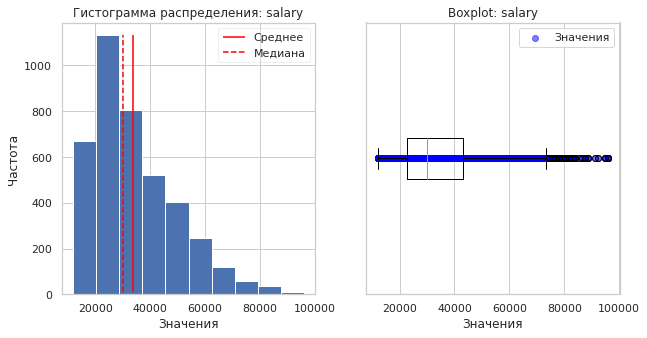

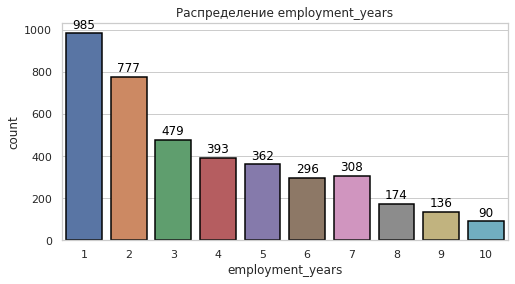

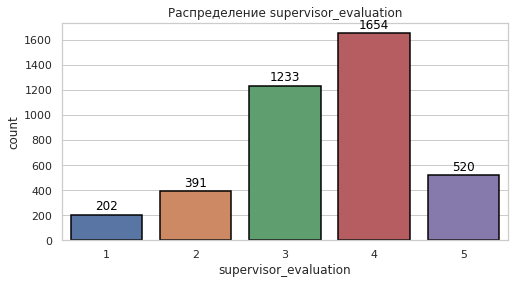

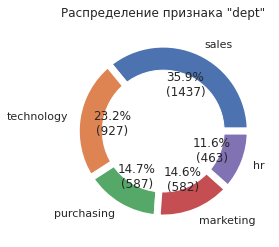

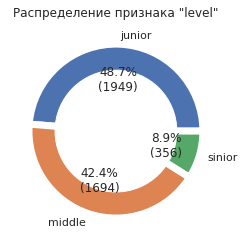

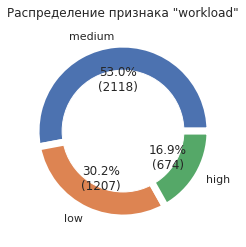

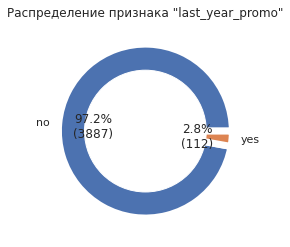

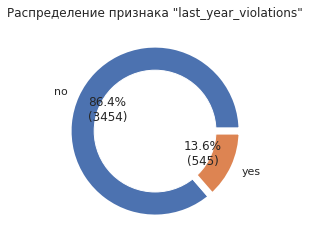

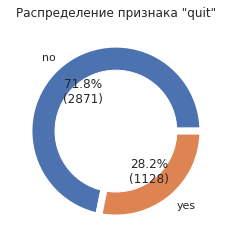

In [70]:
exploratory_analysis(train_quit)

__Итак, исследовательский анализ тренировочной выбоки:__
- employment_years распределение смещено вправо, среднее 3,7 медиана 3, выбросов нет
- supervisor_evaluation распределение немного смещено влево, среднее 3,47 медиана 4, есть выбросы но это не аномалии.
- salary распределение смещено вправо, среднее 33805 медиана 30000,есть выбросы, но это не аномалии.

__Категориальные признаки:__
- dept больше всего сотрудников в sales, 35,9% (1437), далее по убыванию technology, purchasing, marketing, hr. Подробнее выше
- level большинство джуны , 48,7% далее мидлы 42,4% и сеньеры 9%
- workload можно увидеть выше на визуализации
- last year promo был только у 2,8%
- last year violations у 13,6%
- quit целевой, уволились 28,2% 1128 человек против 71,8% оставшихся

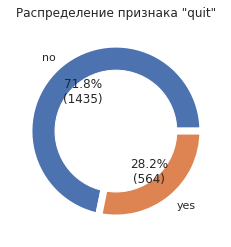

In [72]:
exploratory_analysis(y_test_quit)

__В тестовой выборке целевого признака соблюдена размерность страт__

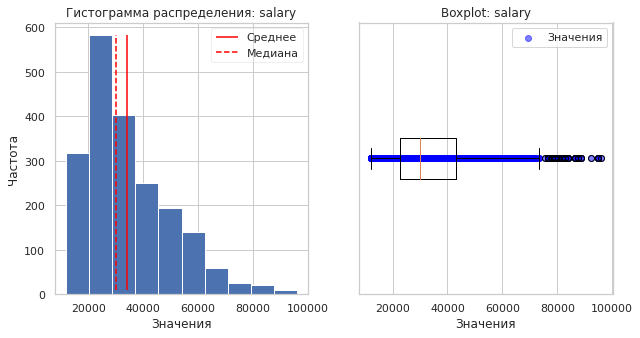

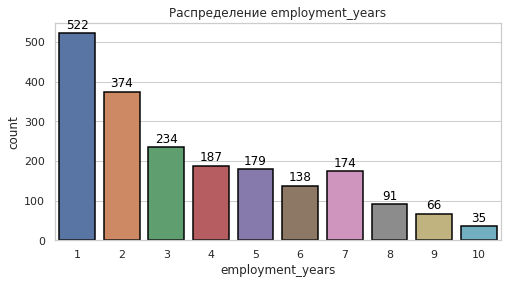

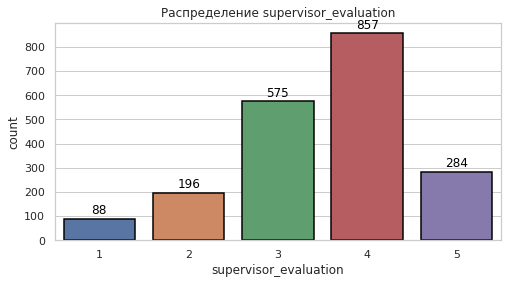

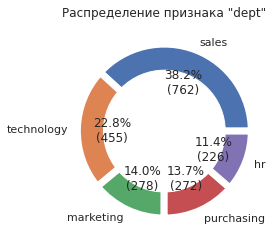

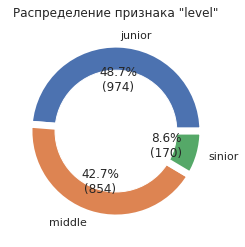

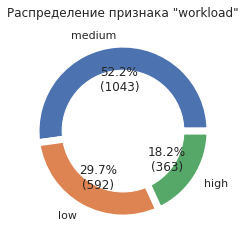

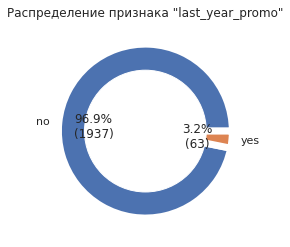

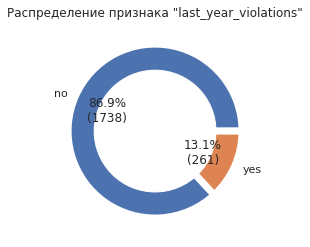

In [75]:
exploratory_analysis(jsr_test_X)

__Данные в тестовой выборке входных признаков, которая явдляется той же, что и в пред. задании, признаки распределены аналогично тренировочной выборке__

#### Составьте портрет «уволившегося сотрудника». Например, можно узнать, в каком отделе с большей вероятностью работает уволившийся сотрудник и какой у него уровень загруженности. Также можно сравнить среднее значение зарплаты ушедших сотрудников с теми, кто остался в компании.

Так как test и train у нас аналогичны, можно провести исследование на train.

In [76]:
train_quit.head()

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit
0,723290,sales,middle,high,2,no,no,4,54000.0,no
1,814010,sales,junior,medium,2,no,no,4,27600.0,no
2,155091,purchasing,middle,medium,5,no,no,1,37200.0,no
3,257132,sales,junior,medium,2,no,yes,3,24000.0,yes
4,910140,marketing,junior,medium,2,no,no,5,25200.0,no


In [77]:
quit_df = train_quit.query('quit == "yes"')
quit_df.head()

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit
3,257132,sales,junior,medium,2,no,yes,3,24000.0,yes
5,699916,sales,junior,low,1,no,yes,3,18000.0,yes
9,613206,technology,middle,medium,2,no,no,3,45600.0,yes
24,468145,technology,junior,medium,2,no,no,3,30000.0,yes
25,982346,marketing,junior,medium,3,no,no,3,30000.0,yes


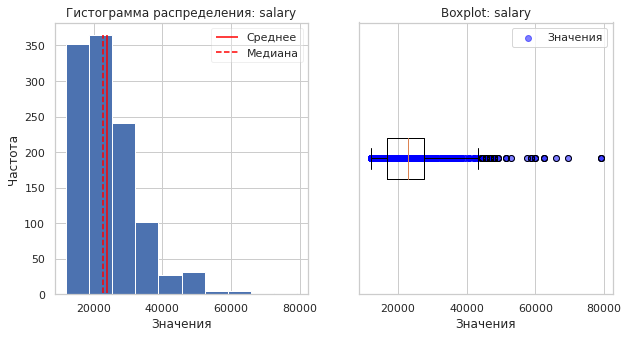

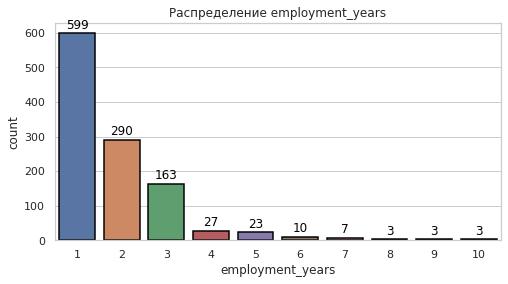

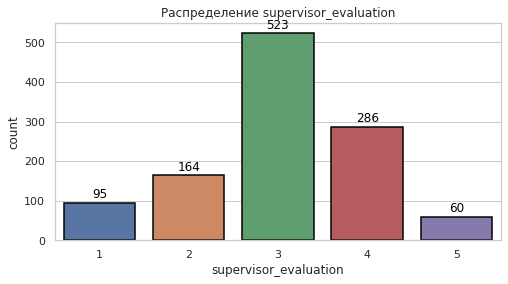

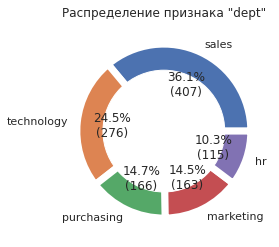

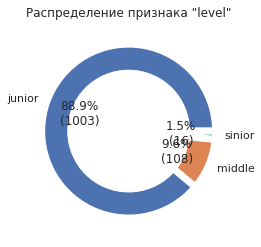

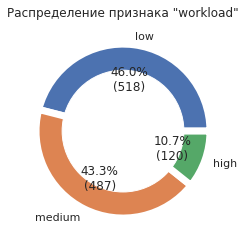

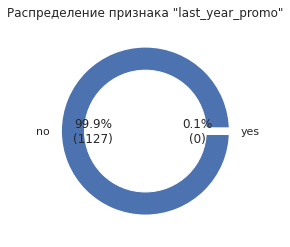

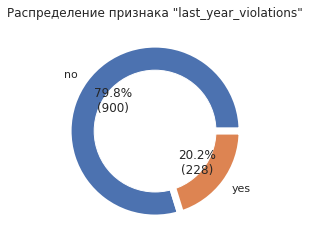

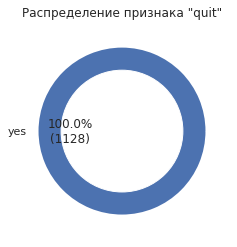

In [80]:
exploratory_analysis(quit_df)

In [81]:
quit_df.describe()

,id,employment_years,supervisor_evaluation,salary
count,1128.000000,1128.000000,1128.000000,1128.000000
mean,544544.457447,1.844858,3.046099,23885.106383
std,258059.498361,1.274920,0.973291,9351.599505
min,100222.000000,1.000000,1.000000,12000.000000
25%,325073.000000,1.000000,3.000000,16800.000000
50%,545003.500000,1.000000,3.000000,22800.000000
75%,756296.000000,2.000000,4.000000,27600.000000
max,999158.000000,10.000000,5.000000,79200.000000


__Итак, уволившиеся сотрудники:__
- Во первых employment years среднее и медиана 1,84 и 1 год соответвенно. Это значительно меньше 3х и 3,7 лет на всей выборке train. Т.е как правило это сотрудникиработающее в компании менее 2 лет - 75% от всех уволившихся.
- Зарплата у уволившихся сотрудников также меньше чем от общего числа сотрудников, медиана 22 800 против 30 000 на всей выборке.
У 75% уволившихся ЗП менее 27 600.
- Тенденции по отделам нет, распределение примерно такое же как по общей выборке
- а вот level в подавляющем большинстве у уволившихся сотрудников джуны, 89%
- ни у кого не было повышения в прошлом году


In [82]:
pivot_df = quit_df.pivot_table(index=['dept', 'workload'], values='quit', aggfunc='count',margins=True).sort_values(by=['dept', 'quit'], ascending=False)

subtotals = pivot_df.groupby('dept').sum().rename(columns={'quit': 'quit'}) 
subtotals['level'] = 'Subtotal'
subtotals = subtotals.set_index('level', append=True)

final_df = pd.concat([pivot_df, subtotals]).sort_values(by=['dept', 'quit'], ascending=False)


final_df

quit
dept       workload      
technology Subtotal   276
           medium     125
           low        121
           high        30
sales      Subtotal   407
           low        187
           medium     177
           high        43
purchasing Subtotal   166
           low         75
           medium      70
           high        21
marketing  Subtotal   163
           medium      72
           low         71
           high        20
hr         Subtotal   116
           low         65
           medium      44
           high         7
All                  1128
           Subtotal  1128

- Как мы видим на таблице выше, более всего увольнений в департаменте продаж и нагруженность сотрудника врьируется от низкой до средней
- далее technology, но количесво увольнениний по workload между низким и средним почти равно

__Итак, уволившийся сотрудник это:__
- сотрудники работающее в компании менее 2 лет - 75% от всех уволившихся
- salary менее 27 600
- c level junior
- без повышения в прошлом году

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 
    
Молодец, что используешь относительные значения в описании портрета уволившегося сотрудника

#### Аналитики утверждают, что уровень удовлетворённости сотрудника работой в компании влияет на то, уволится ли сотрудник. Проверьте это утверждение: визуализируйте и сравните распределения признака job_satisfaction_rate для ушедших и оставшихся сотрудников. Используйте данные с обоими целевыми признаками тестовой выборки.

Добавим  данные об уходе сотрудника из y_test_quit в тестовую выборку из предыдущего задания

In [83]:
test_full = pd.merge(jsr_test,y_test_quit, on='id', how='inner')
test_full.head()

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate,quit
0,485046,marketing,junior,medium,2,no,no,5,28800.0,0.79,no
1,686555,hr,junior,medium,1,no,no,4,30000.0,0.72,no
2,467458,sales,middle,low,5,no,no,4,19200.0,0.64,no
3,418655,sales,middle,low,6,no,no,4,19200.0,0.60,no
4,789145,hr,middle,medium,5,no,no,5,40800.0,0.75,no


In [84]:
test_full.shape

(2000, 11)

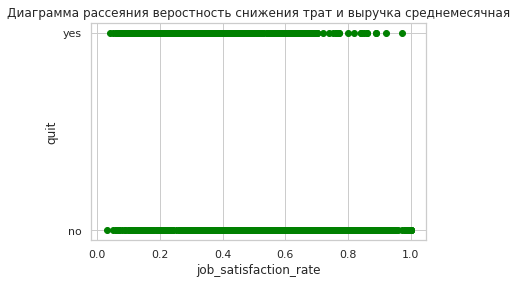

In [85]:
x = test_full['job_satisfaction_rate']
y = test_full['quit']

plt.scatter(x, y, color='green', label='Данные')
plt.title('Диаграмма рассеяния веростность снижения трат и выручка среднемесячная')
plt.xlabel('job_satisfaction_rate')
plt.ylabel('quit')
plt.show()

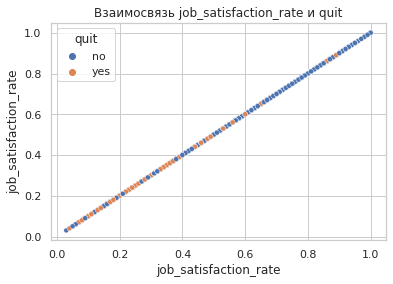

In [86]:
sns.scatterplot(x=test_full['job_satisfaction_rate'],
               y=test_full['job_satisfaction_rate'],
               hue=test_full['quit'],
               s=25)
plt.title('Взаимосвязь job_satisfaction_rate и quit')
plt.show()

In [94]:
jsr_quit = test_full[['job_satisfaction_rate', 'quit']]
jsr_quit['jsr_more_0.65'] = jsr_quit['job_satisfaction_rate'].apply(lambda x: 'yes' 
                                                                    if x > 0.65
                                                                    else 'no')

/tmp/ipykernel_478/2895430354.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jsr_quit['jsr_more_0.65'] = jsr_quit['job_satisfaction_rate'].apply(lambda x: 'yes'


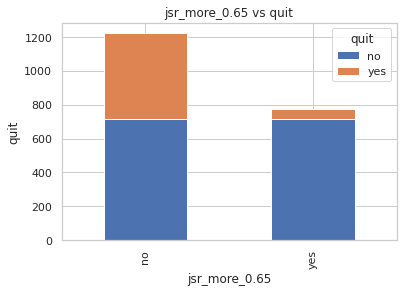

In [95]:
crosstab = pd.crosstab(jsr_quit['jsr_more_0.65'], jsr_quit['quit'])
crosstab.plot(kind='bar', stacked=True)
plt.xlabel('jsr_more_0.65')
plt.ylabel('quit')
plt.title('jsr_more_0.65 vs quit')
plt.show()

In [96]:
jsr_quit.phik_matrix()

interval columns not set, guessing: ['job_satisfaction_rate']


,job_satisfaction_rate,quit,jsr_more_0.65
job_satisfaction_rate,1.000000,0.610263,0.986704
quit,0.610263,1.000000,0.545471
jsr_more_0.65,0.986704,0.545471,1.000000


- На графиках выше, мы можем наблюдать, что действительно, ушедшие сотрудники в подавляющем большинстве имеют job_satisfaction_rate менее 0,65.
- На визуализации где мы выделили категориальный признак jsr more 0.65, мы можем наблюдать, что лишь малая доля сотрудников с оценкой удовлетворенности более 0,65 увольняются, а вот сотрудники с jsr менее 0,65 склонны к увольнению, из 1200 таких сотрудников примерно 450 увольняются.
- также корреляция фик говрит об умеренной связи между jsr и quit, коефициент равен 0,61

<br/>
<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку🤔:</b>
    
- Нужно еще визуализировать и сравнить распределения признака job_satisfaction_rate для ушедших и оставшихся работников (нужно использовать графики плотности или kde вместо гистограмм частотности (по оси У доля относительно датасета вместо абсолютного количества). Наличие либо отсутствие разницы будет более очевидным.  Рекомендую тебе нормализовать гистограммы, используя метод `sns.kdeplot`)
    
- провести стат тест (это по желанию)

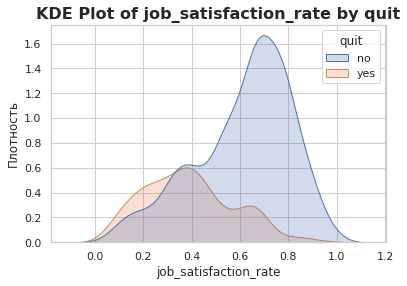

In [97]:
sns.kdeplot(x='job_satisfaction_rate', hue='quit', data=jsr_quit, fill=True)
plt.title('KDE Plot of job_satisfaction_rate by quit', fontsize=16, weight='bold')
plt.ylabel('Плотность')
plt.show()

График распределения непрерывной переменной удовлетворенности работой, позволяет нам сравнить распределение среди двух групп, те кто уволились и те кто нет. Разница очевидна, Уволившиеся сотрудники имеют распределение удовлетворенности знаичтельно ниже 

</span><br><span style="color: purple; font-weight: bold">Не знал о таком, добавил, спасибо</span> 

<div class="alert alert-success">
<h2> Комментарий ревьюера 2 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b>

### Добавление нового входного признака

In [98]:
train_quit.head()

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit
0,723290,sales,middle,high,2,no,no,4,54000.0,no
1,814010,sales,junior,medium,2,no,no,4,27600.0,no
2,155091,purchasing,middle,medium,5,no,no,1,37200.0,no
3,257132,sales,junior,medium,2,no,yes,3,24000.0,yes
4,910140,marketing,junior,medium,2,no,no,5,25200.0,no


In [99]:
train_quit_jsr = train_quit.drop(columns='quit')

In [100]:
train_quit_jsr_transformed = data_preprocessor.transform(train_quit_jsr)
train_quit_jsr_transformed = pd.DataFrame(train_quit_jsr_transformed, columns=feature_names)

In [101]:
jsr_predict_train_quit = grid_search.predict(train_quit_jsr_transformed)

In [102]:
train_quit['job_satisfaction_rate'] = jsr_predict_train_quit

In [103]:
train_quit.head()

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit,job_satisfaction_rate
0,723290,sales,middle,high,2,no,no,4,54000.0,no,0.633103
1,814010,sales,junior,medium,2,no,no,4,27600.0,no,0.826988
2,155091,purchasing,middle,medium,5,no,no,1,37200.0,no,0.382727
3,257132,sales,junior,medium,2,no,yes,3,24000.0,yes,0.340000
4,910140,marketing,junior,medium,2,no,no,5,25200.0,no,0.853333


__Добавили jsr предсказанный нашей лучшей моделью DecisionTreeRegressor в тренировочную выборку по увольнениям__

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 
    
Хорошо, признак job_satisfaction_rate добавлен в тренировочную и тестовую выборки, а значения предсказаны с помощью лучшей модели регрессии, обученной в прошлой части задачи

### Подготовка данных

In [104]:
train_quit_X = train_quit.drop(columns='quit')
train_quit_y = train_quit.quit
#тестовые входные те же, что в пред задании, возьмем из пункта 2.3.3 где мы объединили входные с целевым
test_quit_X = test_full.drop(columns='quit')
test_quit_y = test_full.quit

In [105]:
train_quit_X.shape, train_quit_y.shape, test_quit_X.shape, test_quit_y.shape

((4000, 10), (4000,), (2000, 10), (2000,))

In [106]:
train_quit_X.head()

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
0,723290,sales,middle,high,2,no,no,4,54000.0,0.633103
1,814010,sales,junior,medium,2,no,no,4,27600.0,0.826988
2,155091,purchasing,middle,medium,5,no,no,1,37200.0,0.382727
3,257132,sales,junior,medium,2,no,yes,3,24000.0,0.340000
4,910140,marketing,junior,medium,2,no,no,5,25200.0,0.853333


In [107]:
test_quit_X.head()

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
0,485046,marketing,junior,medium,2,no,no,5,28800.0,0.79
1,686555,hr,junior,medium,1,no,no,4,30000.0,0.72
2,467458,sales,middle,low,5,no,no,4,19200.0,0.64
3,418655,sales,middle,low,6,no,no,4,19200.0,0.60
4,789145,hr,middle,medium,5,no,no,5,40800.0,0.75


In [108]:
ohe_cols = ['dept', 'last_year_promo', 'last_year_violations']
ord_cols = ['level', 'workload']
num_cols = train_quit_X.select_dtypes(include=[int,'float64']).columns.to_list()

В препроцессор вносить изменения не требуется, добавился только один признак float64, сам jsr.
Только переобучим его для новых моделей

In [109]:
train_quit_X_transformed = data_preprocessor.fit_transform(train_quit_X)
test_quit_X_transformed = data_preprocessor.transform(test_quit_X)

__Данные подготовлены__

### Обучение модели

Предлагаю использовать pipeline для обучения 3х моделей и подборов гиперпареметров. Тем более препроцессор уже готов

In [110]:
pipe_final = Pipeline([
('preprocessor', data_preprocessor),
('models', LogisticRegression(random_state=RANDOM_STATE))
])

Теперь составим словарь список словарей с параметрами, которые будем перебирать search, также можем перебрать несколько кодировщиков на количественных признаков.

In [111]:
param_grid = [
    {
     'models': [LogisticRegression(
        random_state=RANDOM_STATE,
        solver='liblinear',
        penalty='l1'
    )],
    'models__C': range(1,5),
    'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']   
    },
    
    {
    'models': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
    'models__max_depth': range(2,7),
    'models__max_features': range(2,7),
    'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']    
    },
    
    {
    'models': [KNeighborsClassifier()],
    'models__n_neighbors': range(2,7),
    'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']    
    },
    
    {
    'models': [SVC(kernel='poly',probability=True,random_state=RANDOM_STATE)],
    'models__degree': range(2,7),
    'models__C': range(1,5),
    'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']    
    }
]

Метрику будем использвать roc auc score, Критерий успеха: ROC-AUC ≥0.91 на тестовой выборке.

In [112]:
randomized_search = RandomizedSearchCV(
pipe_final,
param_grid,
cv=5,
scoring='roc_auc',
random_state=RANDOM_STATE,
n_jobs=-1
)
randomized_search.fit(train_quit_X, train_quit_y)

/opt/conda/lib/python3.9/site-packages/sklearn/compose/_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('ohe',
                                                                               Pipeline(steps=[('simpleImputer_ohe',
                                                                                                SimpleImputer(strategy='most_frequent')),
                                                                                               ('ohe',
                                                                                                OneHotEncoder(drop='first',
                                                                                                              handle_unknown='ignore',
                                                                                                              sparse_output=False))]),
                                                                               ['dept',
                                                                                'last_year_promo',
                                                                                'last_year_violations']),
                                                                              ('ord',
                                                                               Pip...
                                        {'models': [KNeighborsClassifier()],
                                         'models__n_neighbors': range(2, 7),
                                         'preprocessor__num': [StandardScaler(),
                                                               MinMaxScaler(),
                                                               'passthrough']},
                                        {'models': [SVC(kernel='poly',
                                                        probability=True,
                                                        random_state=42)],
                                         'models__C': range(1, 5),
                                         'models__degree': range(2, 7),
                                         'preprocessor__num': [StandardScaler(),
                                                               MinMaxScaler(),
                                                               'passthrough']}],
                   random_state=42, scoring='roc_auc')

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b>  
    
Для кодирования таргета стоит использовать label encoder. Заранее предупрежу, что обучать `LabelEncoder()` нужно будет на тренировочной выборке, а потом метод `transform` уже применять к тестовой выборке: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html.

    
    le = LabelEncoder()
    le.fit_transform(X_train['quit'])
    le.transform(X_test['quit'])
    


        
        
        

</span><br><span style="color: purple; font-weight: bold">А для чего выполнять кодирование таргета?</span> 

In [113]:
print('Лучшая модель и её параметры:\n\n', randomized_search.best_estimator_)
print ('Метрика лучшей модели на тренировочной выборке:', randomized_search.best_score_)

Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['dept', 'last_year_promo',
                                                   'last_year_violations']),
                                                 ('ord',
                            

__Итак, методом randomizedsearch найдена лучшая модель: SVC(C=1, degree=4, kernel='poly', probability=True, random_state=42), MinMaxScaler кодировщик. Лучшее значение метрики 0,92. Проверим результат на тестовой выборке.__

In [114]:
preds = randomized_search.predict_proba(test_quit_X)

В roc auc score нужно передать вероятности старшего класса, т.е. вероятности что сотрудник уволится, они в preds[:,1]

In [115]:
roc_auc = roc_auc_score(test_quit_y, preds[:,1])
print('ROC-AUC = ', roc_auc.round(2))

ROC-AUC =  0.92


__Отлично, мы справились с задачей, модель и параметры для предсказывания увльнения сотрудника подобраны, метрика roc_auc соответвует требованиям__

### Выводы. Сделайте промежуточные выводы о том, какая модель справилась лучше и почему.

In [116]:
result = pd.DataFrame(randomized_search.cv_results_)
result[
    ['rank_test_score', 'param_models', 'mean_test_score','params']
].sort_values('rank_test_score')

,rank_test_score,param_models,mean_test_score,params
1,1,"SVC(kernel='poly', probability=True, random_st...",0.921440,"{'preprocessor__num': MinMaxScaler(), 'models_..."
8,2,KNeighborsClassifier(),0.905383,"{'preprocessor__num': MinMaxScaler(), 'models_..."
7,3,DecisionTreeClassifier(random_state=42),0.897345,"{'preprocessor__num': StandardScaler(), 'model..."
3,4,DecisionTreeClassifier(random_state=42),0.896050,"{'preprocessor__num': MinMaxScaler(), 'models_..."
9,5,"SVC(kernel='poly', probability=True, random_st...",0.895780,"{'preprocessor__num': StandardScaler(), 'model..."
4,6,KNeighborsClassifier(),0.890830,"{'preprocessor__num': MinMaxScaler(), 'models_..."
5,7,DecisionTreeClassifier(random_state=42),0.796809,"{'preprocessor__num': 'passthrough', 'models__..."
6,8,KNeighborsClassifier(),0.702090,"{'preprocessor__num': 'passthrough', 'models__..."
0,9,"SVC(kernel='poly', probability=True, random_st...",0.629675,"{'preprocessor__num': 'passthrough', 'models__..."
2,10,"SVC(kernel='poly', probability=True, random_st...",0.625454,"{'preprocessor__num': 'passthrough', 'models__..."


Выше предствалены результаты поиска моделей в randomized search и их параметров.
Как мы видим, победитель SVC(C=1, degree=4, kernel='poly', probability=True) со среднем значением метрики 0,92 с кросс валидацией по 5 блокам. Далее модель KNeighborsClassifier и DecisionTreeClassifier с метриками 0,90 и 0,89 соответвенно. Методом проб, модель опорных векторов лучше всех справилась с задачей. Геометрический подход к решению, меньшая подверженность выбросам и нелинейные связи в данных сыграли в плюс для данной модели с полиномиальным ядром 4й степени.

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 
    
На тестовой выборке получено хорошее качество)

## Общий вывод

В ходе анализа даннных HR-аналитики компании «Работа с заботой» было было проделано:
- Была выполнена предобработка и исследовательский анализ данных
- Выполнен подбор и обучения моделей МО для предсказания уровней удовлетворённости сотрудников работой в компании:
  - подобрана и обучена модель DecisionTreeRegressor и параметры к ней
  - полученная метрика качества на тестовой выборке соответсвует требованиям, SMAPE = 14,13
- Подтверждена связь между уровнем удовлетворенности сотрудника и увольнением
- Составлен портрет уволившегося сотрудника:
  - сотрудники работающее в компании менее 2 лет - 75% от всех уволившихся
  - salary менее 27 600
  - level junior
  - без повышения в прошлом году
-   Выполнен подбор и обучение модели для предказания уольнения сотрудников:
  - произведен перебор 4х моделей и параметров к ним
  - найдена лучшая модель: SupportVectorClassification
  - Метрика на тестовых данных соответствует требованиям, ROC AUC 0,92
  
- Рекомендации для бизнеса:
  - если необходимо снизить утечку кадров и удержать сотрудников подходящих под критерии увольняющегося сотрудника описанные выше, то необходимо:
     - увеличить заработную плату таким сотрудникам
     - представить таких сотрудников к повышению
     - это увечит их уровень удолетворенности и в свою очередь уменьшит вероятность увольнений.

<br/>
<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>
    
<b>На доработку🤔:</b>
    
В итоговый вывод нужно добавить рекомендации для бизнеса. Поправь, пожалуйста



</span><br><span style="color: purple; font-weight: bold">Добавил</span> 

<div style="border:solid Chocolate 2px; padding: 40px">


<h2> Итоговый комментарий ревьюера (общий вывод по проекту) <a class="tocSkip"> </h2>    
    
  
У меня сложилось хорошее общее впечатление о проекте, тебе удалось неплохо справиться с этим проектом. Молодец! Подготовлены данные для анализа, изучен каждый параметр. Все красиво визуализировано, построено несколько моделей регрессии/ классификации и оценено их качество. Осмысленная аналитика и дельная модельная работа - многое удалось как надо)
    
Отмечу отдельные положительные моменты проекта🙂:
    
- в ходе проекта встречались  функции, помогающие избавиться от дублирования кода;
- много красивых визуализаций в проекте и хорошая интерпретация;
- при обучении моделей использованы пайплайны, кросс-валидация и поиск гиперпараметров.
    
Есть несколько моментов всего, на которые стоит ещё раз взглянуть, я указал их в моих комментариях по ходу проекта. Предлагаю тебе доработать проект по моим комментариям, чтобы довести его до совершенства.

    
 
</div>
    
